# 0.IMPORTS

## 0.1. Importing libraries

In [1]:
import pandas   as pd
import seaborn  as sns
import numpy    as np

import ydata_profiling
import matplotlib.pyplot as plt
import math

## 0.2. Loading data

In [2]:
stores         = pd.read_csv('datasets/stores.csv', low_memory=False)
train          = pd.read_csv('datasets/train.csv', low_memory=False)
train_features = pd.read_csv('datasets/train_features.csv', low_memory=False)

test = pd.read_csv('datasets/test.csv', low_memory=False)
test_features = pd.read_csv('datasets/test_features.csv', low_memory=False)

In [3]:
train_features.head()

,loja,data,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,feriado,distancia_competidores,clientes
0,4,01-07,4.077778,2.980,NaN,NaN,NaN,NaN,NaN,0.06510,nao,NaN,216
1,32,01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08818,nao,NaN,3
2,1,01-07,9.038889,2.976,NaN,NaN,NaN,NaN,NaN,0.07742,nao,NaN,160
3,7,01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08818,nao,NaN,739
4,43,01-07,4.705556,NaN,NaN,NaN,NaN,NaN,NaN,0.10398,nao,NaN,998


## 0.3. Helper functions

In [4]:
# Função para renomear as colunas do dataframe
def rename_columns(cols):
    cols = list(map(lambda x: inflection.titleize(x), cols))
    cols = list(map(lambda x: x.replace(" ", ""), cols))
    cols = list(map(lambda x: x.replace(".", ""), cols))
    cols = list(map(lambda x: inflection.underscore(x), cols))
    return cols

# Função que retorna uma tabela de únicos e suas respectivas quantidades
def tab_unique(df):
    tab_unicos = pd.DataFrame(df.nunique())
    tab_unicos.columns= ['count']
    tab_unicos['content'] = df.apply(lambda x: x.unique())
    return tab_unicos

## 0.4. Dicionário de dados

# 1. DATA DESCRIPTION

## 1.1. Unir tabelas

In [5]:
df = pd.merge(train, stores, on='loja', how='inner')

In [6]:
df1 = pd.merge(df, train_features, on=['loja', 'data', 'feriado'], how='inner')

## 1.2. Data Dimensions

In [7]:
df1.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
0,140679,17,93,01-07,6283.00,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
1,140696,17,16,01-07,1641.25,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
2,140701,17,4,01-07,39775.45,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
3,140733,17,14,01-07,29555.43,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
4,140742,17,48,01-07,414.00,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541


In [8]:
print('Quantidade de linhas: {:,}'.format(df1.shape[0]))
print('Quantidade de colunas: {:,}'.format(df1.shape[1]))

Quantidade de linhas: 135,385
Quantidade de colunas: 18


## 1.3. Check NA's

In [9]:
df1.isna().sum()

id                             0
loja                           0
setor                          0
data                           0
vendas_semanais            12862
feriado                        0
tipo                           0
tamanho                    33327
temperatura                47945
combustivel                52989
desconto_1                129459
desconto_2                129510
desconto_3                129746
desconto_4                130184
desconto_5                129459
desemprego                     0
distancia_competidores    129459
clientes                       0
dtype: int64

In [10]:
stores.isna().sum()

loja        0
tipo        0
tamanho    11
dtype: int64

In [11]:
stores['loja'].nunique()

45

## 1.4. Data Types

In [12]:
df1.dtypes

id                          int64
loja                        int64
setor                       int64
data                       object
vendas_semanais           float64
feriado                    object
tipo                       object
tamanho                   float64
temperatura               float64
combustivel               float64
desconto_1                float64
desconto_2                float64
desconto_3                float64
desconto_4                float64
desconto_5                float64
desemprego                float64
distancia_competidores    float64
clientes                    int64
dtype: object

## 1.5. Check duplicated

In [13]:
# Verificar a existência de registros duplicados
df1.duplicated().sum()

0

## 1.6. Datetime

# 2. TRATAMENTO E FEATURE ENGINEERING

In [14]:
df2 = df1.copy()

## 2.1. Criação das Hipóteses

## 2.2. Transformar e converter

### 2.2.1. Preencher NA´s e excluir colunas

#### 2.2.1.1. Excluir os registros com vendas semanais nula ou menor 100

In [15]:
reg_faltantes = df2.loc[(df2['vendas_semanais'].isna()) | (df2['vendas_semanais'] < 100), :].index
df2.drop(reg_faltantes, axis=0, inplace=True)

df2.reset_index(inplace=True,drop=True)
df2.tail()

#### 2.2.1.2. Preencher os descontos com valores nulos com 0

In [17]:
df2['desconto_1'] = df2['desconto_1'].fillna(0)
df2['desconto_2'] = df2['desconto_2'].fillna(0)
df2['desconto_3'] = df2['desconto_3'].fillna(0)
df2['desconto_4'] = df2['desconto_4'].fillna(0)
df2['desconto_5'] = df2['desconto_5'].fillna(0)

#### 2.2.1.3. Preencher o tamanho das lojas faltantes com 0 e considerar online

In [18]:
tam_faltantes = df2.loc[df2['tamanho'].isna(), :].index

In [19]:
df2['tamanho'] = df2['tamanho'].apply(lambda x: 0 if math.isnan(x) else x)

In [20]:
df2.iloc[tam_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
5329,140681,3,25,01-07,2658.57,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5330,141029,3,20,01-07,1358.81,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5331,141077,3,34,01-07,3280.50,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5332,141106,3,23,01-07,6530.88,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5333,141169,3,19,01-07,3113.76,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113407,274985,11,71,11-18,9419.43,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113408,274997,11,67,11-18,9790.06,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113409,275011,11,79,11-18,26994.74,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113410,275018,11,74,11-18,18686.63,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953


#### 2.2.1.4. Preencher a temperatura faltantes usando a média

In [21]:
media = df2['temperatura'].mean()
media

15.588963417919134

In [22]:
temp_faltantes = df2.loc[df2['temperatura'].isna(), :].index

In [23]:
%%time
df2['temperatura'] = df2['temperatura'].apply(lambda x: media if math.isnan(x) else x)

CPU times: total: 0 ns
Wall time: 125 ms


In [24]:
df2.iloc[temp_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
121,146595,17,6,01-21,4548.82,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
122,146907,17,1,01-21,16137.30,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
123,146975,17,2,01-21,39712.80,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
124,146986,17,3,01-21,16762.49,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
125,147010,17,4,01-21,22773.89,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114833,275307,33,90,11-18,23462.71,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114834,275374,33,96,11-18,10445.16,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114835,275387,33,95,11-18,25464.21,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114836,275397,33,98,11-18,7730.53,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156


#### 2.2.1.5. Preencher os registros com combustível faltantes usando a média

In [25]:
media = df2['combustivel'].mean()
media

3.596657919601641

In [26]:
comb_faltantes = df2.loc[df2['combustivel'].isna(), :].index

In [27]:
%%time
df2['combustivel'] = df2['combustivel'].apply(lambda x: media if math.isnan(x) else x)

CPU times: total: 46.9 ms
Wall time: 134 ms


In [28]:
df2.iloc[comb_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
356,158299,17,24,02-18,3652.300000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
357,158421,17,20,02-18,3273.070000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
358,158480,17,58,02-18,1200.000000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
359,158538,17,18,02-18,10202.870000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
360,158602,17,19,02-18,4271.550000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114549,249118,33,92,09-16,35013.170000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114550,249134,33,5,09-16,110.000000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114551,249248,33,81,09-16,887907.904893,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114552,249292,33,90,09-16,25796.820000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685


#### 2.2.1.6. Preencher os registros com distancia faltantes usando um número grande

In [29]:
comp_faltantes = df2.loc[df2['distancia_competidores'].isna(), :].index

In [30]:
%%time
df2['distancia_competidores'] = df2['distancia_competidores'].apply(lambda x: 300000 if math.isnan(x) else x)

CPU times: total: 62.5 ms
Wall time: 161 ms


In [31]:
df2.iloc[comb_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
356,158299,17,24,02-18,3652.300000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
357,158421,17,20,02-18,3273.070000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
358,158480,17,58,02-18,1200.000000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
359,158538,17,18,02-18,10202.870000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
360,158602,17,19,02-18,4271.550000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114549,249118,33,92,09-16,35013.170000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114550,249134,33,5,09-16,110.000000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114551,249248,33,81,09-16,887907.904893,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114552,249292,33,90,09-16,25796.820000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685


#### 2.2.1.7. Excluir a colunas: temperatura

In [32]:
df2.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
0,140679,17,93,01-07,6283.00,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
1,140696,17,16,01-07,1641.25,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
2,140701,17,4,01-07,39775.45,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
3,140733,17,14,01-07,29555.43,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
4,140742,17,48,01-07,414.00,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541


In [33]:
df2.drop('temperatura', axis=1, inplace=True)

#### 2.2.1.8. Excluir registros com menos de 10 clientes

In [112]:
poucos_clientes = df2.loc[df2['clientes'] < 10, :].index
df2.drop(poucos_clientes, axis=0, inplace=True)

df2.reset_index(inplace=True,drop=True)
df2.tail()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
108917,270035,33,2,2023-11-04,7008.400000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
108918,270074,33,7,2023-11-04,231.710000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
108919,270078,33,87,2023-11-04,399.360000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
108920,270095,33,5,2023-11-04,890215.052507,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
108921,270115,33,1,2023-11-04,6531.230000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0


### 2.2.2. Transformação de tipos

In [34]:
df2.dtypes

id                          int64
loja                        int64
setor                       int64
data                       object
vendas_semanais           float64
feriado                    object
tipo                       object
tamanho                   float64
combustivel               float64
desconto_1                float64
desconto_2                float64
desconto_3                float64
desconto_4                float64
desconto_5                float64
desemprego                float64
distancia_competidores    float64
clientes                    int64
dtype: object

#### 2.2.2.1 Transformar data nas colunas dia e mes

In [35]:
df2['data'] = pd.to_datetime(df2['data'] + '-2023', format='%m-%d-%Y')

In [36]:
df2["week_of_year"] = df2["data"].dt.strftime("%U")

#### 2.2.2.2. Transformar feriado em 0 e 1

In [37]:
df2['feriado'] = df2['feriado'].apply(lambda x: 1 if x == 'sim' else 0)

In [38]:
df2['feriado'].unique()

array([0, 1], dtype=int64)

## 2.3. Criar

### 2.3.1. Classificar as lojas pelo tamanho

In [39]:
q1 = df2['tamanho'].quantile(0.25)
q2 = df2['tamanho'].quantile(0.5)
q3 = df2['tamanho'].quantile(0.75)

In [40]:
df2['tipo_de_loja'] = df2['tamanho'].apply(lambda x: 'A' if x < q1 else
                                                     'B' if x < q3 else 'C')

In [41]:
df2.loc[:, ['tipo_de_loja', 'vendas_semanais']].groupby('tipo_de_loja').median()

,vendas_semanais
tipo_de_loja,
A,10141.975
B,7918.290
C,12331.350


### 2.3.2. Somar os desconto semana

In [42]:
df2['desconto'] = df2['desconto_1'] + df2['desconto_2'] + df2['desconto_3'] + df2['desconto_4'] + df2['desconto_5']

In [43]:
df2.drop(['desconto_1', 'desconto_2', 'desconto_3', 'desconto_4', 'desconto_5'], axis=1, inplace=True)

In [44]:
df2.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


### 2.3.4. Remover os dias com desconto

In [45]:
reg_faltantes = df2.loc[df2['desconto'] > 0, :].index
df2.drop(reg_faltantes, axis=0, inplace=True)

df2.reset_index(inplace=True,drop=True)
df2.tail()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
109793,270035,33,2,2023-11-04,7008.400000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109794,270074,33,7,2023-11-04,231.710000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109795,270078,33,87,2023-11-04,399.360000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109796,270095,33,5,2023-11-04,890215.052507,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109797,270115,33,1,2023-11-04,6531.230000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0


### 2.4.3. Criar coluna de fatores externos

In [122]:
df2[['combustivel', 'desemprego']].describe().T

,count,mean,std,min,25%,50%,75%,max
combustivel,108922.0,3.599041,0.226713,2.8910,3.56600,3.596658,3.68400,4.21100
desemprego,108922.0,0.080586,0.018610,0.0442,0.06934,0.078520,0.08523,0.14021


In [123]:
dfx = df2.copy()

In [124]:
media_combustivel = df2['combustivel'].mean()
media_desemprego  = df2['desemprego'].mean()

In [133]:
df2['economia'] = df2.apply(lambda x: 'favoravel' 
                                   if x['combustivel'] < media_combustivel and x['desemprego'] < media_desemprego
                                   else 'desfavoravel'
                                   if x['combustivel'] > media_combustivel and x['desemprego'] > media_desemprego
                                   else 'inconclusivel', axis=1)

df2.drop(['combustivel', 'desemprego'], axis=1, inplace=True)

In [134]:
df2['economia'].value_counts()

inconclusivel    46734
favoravel        45643
desfavoravel     16545
Name: economia, dtype: int64

# 3. EXPLORATORY DATA ANALYSIS (EDA)

In [135]:
df3 = df2.copy()

In [63]:
df3.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


In [64]:
df3[['desemprego', 'combustivel']].describe().T

,count,mean,std,min,25%,50%,75%,max
desemprego,109798.0,0.080594,0.018562,0.0442,0.06934,0.078520,0.08523,0.14021
combustivel,109798.0,3.598831,0.226396,2.8910,3.56600,3.596658,3.68400,4.21100


## 3.1. Análise Univariada

### 3.1.1. Vendas

In [65]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,109798.0,205313.810115,37421.663032,140679.0000,172846.25000,205275.000000,237777.50000,270137.000000
loja,109798.0,21.852693,12.702829,1.0000,11.00000,21.000000,32.00000,45.000000
setor,109798.0,44.021321,30.853652,1.0000,17.00000,36.000000,74.00000,99.000000
vendas_semanais,109798.0,67433.612238,204755.166806,100.0000,3071.72000,9321.175000,25518.04500,999944.947336
feriado,109798.0,0.045793,0.209037,0.0000,0.00000,0.000000,0.00000,1.000000
tamanho,109798.0,101736.361309,75939.308856,0.0000,34875.00000,119557.000000,155083.00000,219622.000000
combustivel,109798.0,3.598831,0.226396,2.8910,3.56600,3.596658,3.68400,4.211000
desemprego,109798.0,0.080594,0.018562,0.0442,0.06934,0.078520,0.08523,0.140210
distancia_competidores,109798.0,300000.000000,0.000000,300000.0000,300000.00000,300000.000000,300000.00000,300000.000000
clientes,109798.0,507.233839,290.801846,1.0000,254.00000,517.000000,760.00000,999.000000


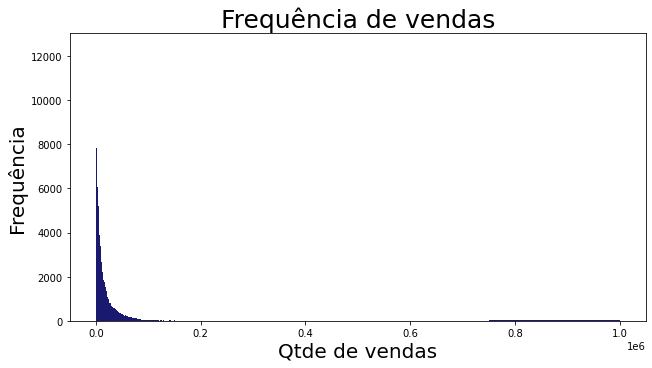

In [66]:
maximo = int(df3['vendas_semanais'].max())

# Cria o gráfico
fig = plt.figure( figsize = (8, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Configura o título e os eixos
ax.set_title('Frequência de vendas', fontsize=25)
ax.set_xlabel('Qtde de vendas', fontsize=20)
ax.set_ylabel('Frequência', fontsize=20)

# Plota e mostra o gráfico
ax.hist(df3['vendas_semanais'], bins=range(0, maximo + 1001, 1000), color='midnightblue')
plt.show()

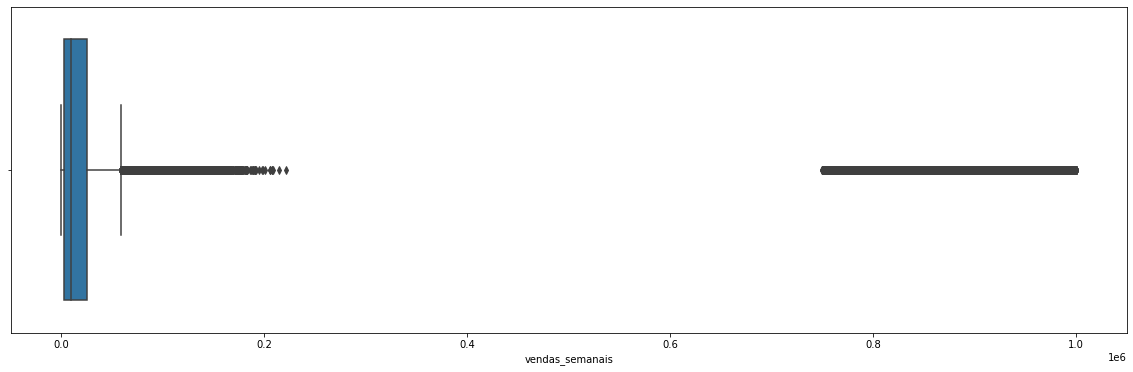

In [67]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=df3['vendas_semanais'])
plt.show()

In [68]:
df3.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


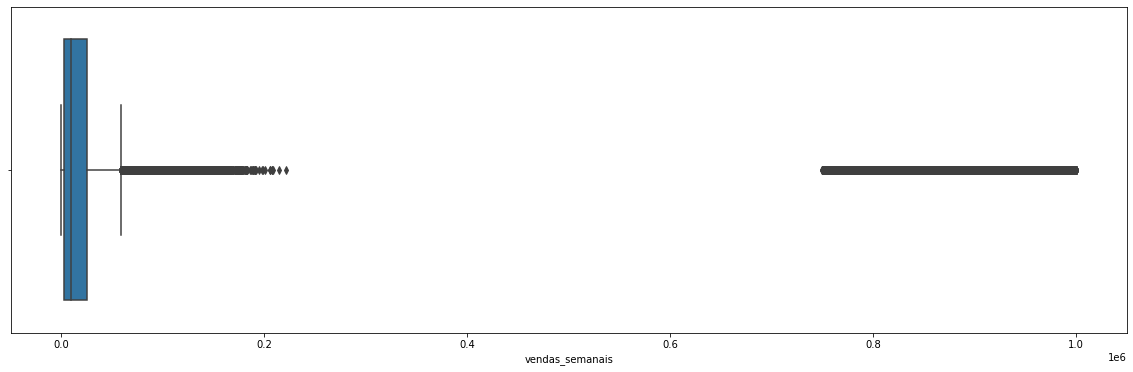

In [69]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
aux = df3[(df3['week_of_year'] != '45') | (df3['week_of_year'] != '46')]
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=aux['vendas_semanais'])
plt.show()

#### 3.1.1.1. Análise de outliers

In [70]:
q1 = df3['vendas_semanais'].quantile(0.25)
q3 = df3['vendas_semanais'].quantile(0.75)

In [71]:
iqr = q3 - q1
iqr

22446.324999999997

In [72]:
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [73]:
limite_superior

59187.532499999994

In [74]:
limite_inferior

-30597.767499999994

In [75]:
df3.loc[df3['vendas_semanais'] < 0, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto


### 3.1.2. Tamanho da loja

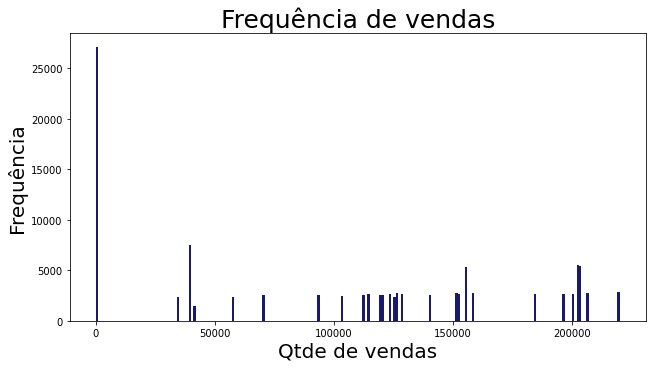

In [76]:
maximo = int(df3['tamanho'].max())

# Cria o gráfico
fig = plt.figure( figsize = (8, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Configura o título e os eixos
ax.set_title('Frequência de vendas', fontsize=25)
ax.set_xlabel('Qtde de vendas', fontsize=20)
ax.set_ylabel('Frequência', fontsize=20)

# Plota e mostra o gráfico
ax.hist(df3['tamanho'], bins=range(0, maximo + 1001, 1000), color='midnightblue')
plt.show()

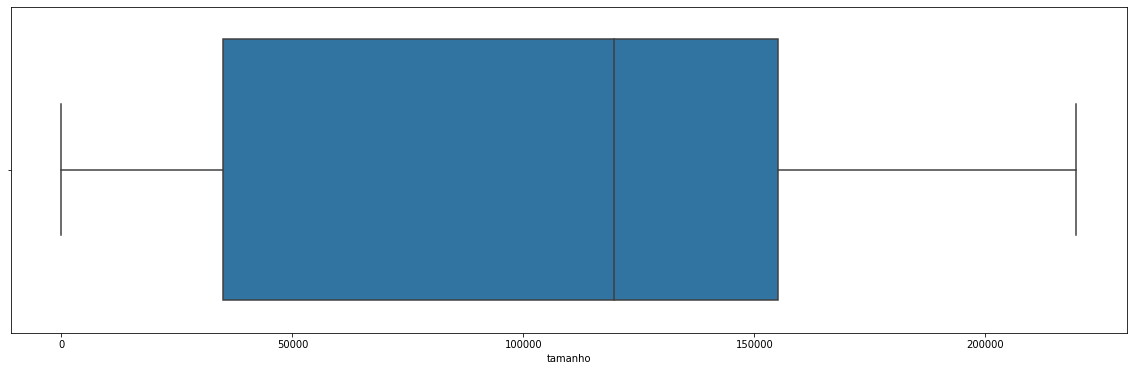

In [77]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=df3['tamanho'])
plt.show()

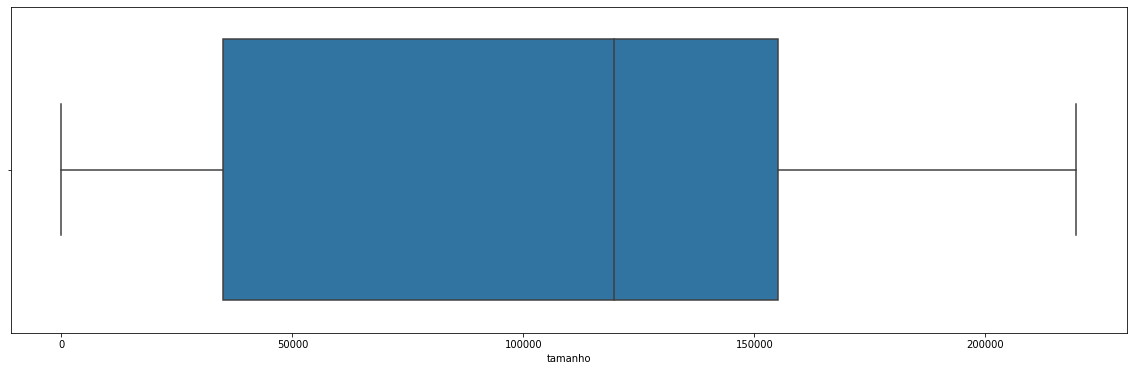

In [78]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x='tamanho', data=aux)
plt.show()

In [79]:
aux = df3.loc[df3['tamanho']!=df3['tamanho'].median(), :].reset_index()
aux

,index,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,0,140679,17,93,2023-01-07,6283.000000,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,1,140696,17,16,2023-01-07,1641.250000,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,2,140701,17,4,2023-01-07,39775.450000,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,3,140733,17,14,2023-01-07,29555.430000,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,4,140742,17,48,2023-01-07,414.000000,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107230,109793,270035,33,2,2023-11-04,7008.400000,0,eletrodomestico,39690.0,3.828,0.08010,300000.0,259,44,B,0.0
107231,109794,270074,33,7,2023-11-04,231.710000,0,eletrodomestico,39690.0,3.828,0.08010,300000.0,259,44,B,0.0
107232,109795,270078,33,87,2023-11-04,399.360000,0,eletrodomestico,39690.0,3.828,0.08010,300000.0,259,44,B,0.0
107233,109796,270095,33,5,2023-11-04,890215.052507,0,eletrodomestico,39690.0,3.828,0.08010,300000.0,259,44,B,0.0


In [80]:
aux2 = df3.loc[df3['tamanho']==df3['tamanho'].median(), :].reset_index()
aux2

,index,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,63079,140737,22,91,2023-01-07,24868.220000,0,eletronico,119557.0,3.193000,0.08458,300000.0,170,01,B,0.0
1,63080,140843,22,1,2023-01-07,11622.460000,0,eletronico,119557.0,3.193000,0.08458,300000.0,170,01,B,0.0
2,63081,140946,22,2,2023-01-07,45804.610000,0,eletronico,119557.0,3.193000,0.08458,300000.0,170,01,B,0.0
3,63082,140958,22,87,2023-01-07,13751.430000,0,eletronico,119557.0,3.193000,0.08458,300000.0,170,01,B,0.0
4,63083,140985,22,90,2023-01-07,21820.500000,0,eletronico,119557.0,3.193000,0.08458,300000.0,170,01,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,65637,268255,22,40,2023-11-04,53242.520000,0,eletronico,119557.0,3.596658,0.07706,300000.0,109,44,B,0.0
2559,65638,268275,22,41,2023-11-04,880299.037363,0,eletronico,119557.0,3.596658,0.07706,300000.0,109,44,B,0.0
2560,65639,268293,22,36,2023-11-04,3644.380000,0,eletronico,119557.0,3.596658,0.07706,300000.0,109,44,B,0.0
2561,65640,268299,22,35,2023-11-04,4384.650000,0,eletronico,119557.0,3.596658,0.07706,300000.0,109,44,B,0.0


In [81]:
aux2['vendas_semanais'].std()

196026.54838417

## 3.2. Análise bivariada

### 3.2.1. Vendas por sazonalidade

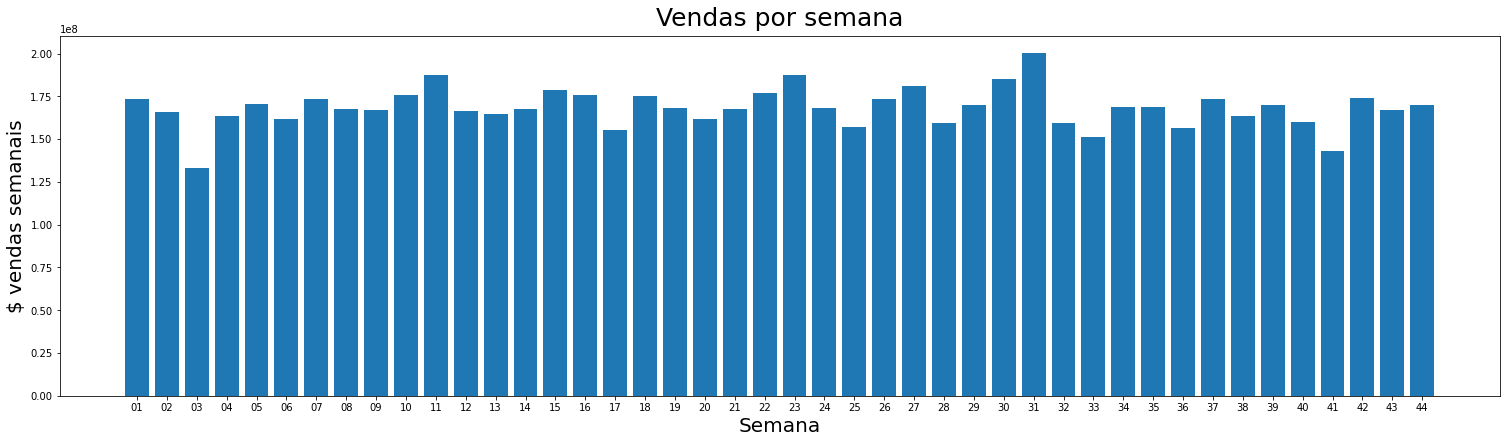

In [82]:
vendas_por_dia_da_semana = df3.groupby('week_of_year')['vendas_semanais'].sum().reset_index()
vendas_por_dia_da_semana.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_dia_da_semana['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por semana', fontsize=25, pad=10)
ax.set_xlabel('Semana', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_dia_da_semana['week_of_year'], vendas_por_dia_da_semana['vendas_semanais'])
plt.show()

### 3.2.2. Vendas por tipo

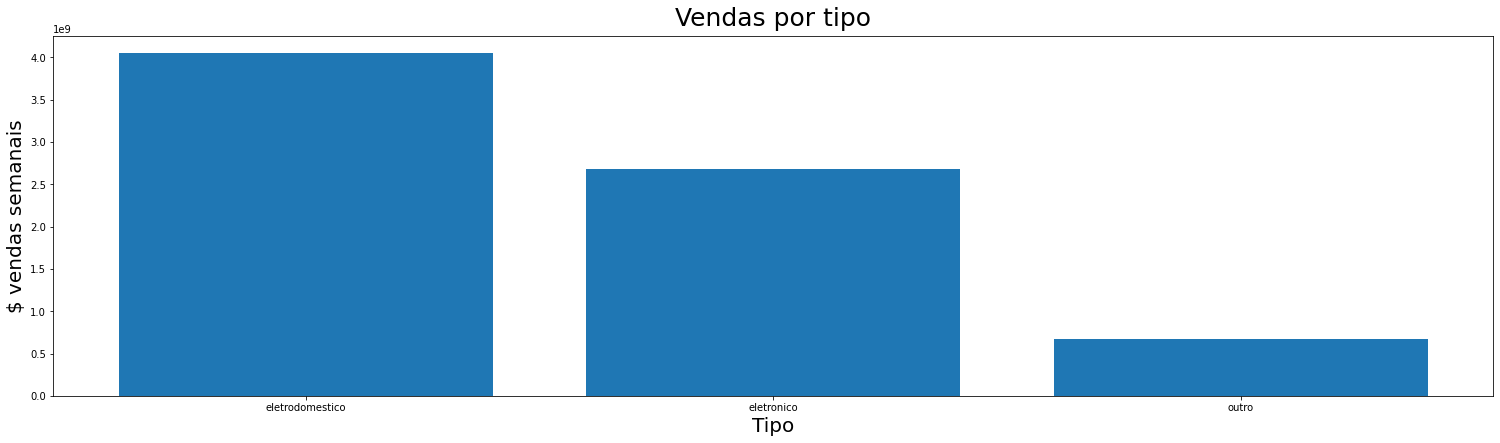

In [83]:
vendas_por_tipo = df2.loc[:, :].groupby('tipo').sum().reset_index()
vendas_por_tipo.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_tipo['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por tipo', fontsize=25, pad=10)
ax.set_xlabel('Tipo', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_tipo['tipo'], vendas_por_tipo['vendas_semanais'])
plt.show()

### 3.2.3. Vendas por setor

In [84]:
df3['setor'].nunique()

79

In [85]:
loja_setor = df3.loc[:, ['loja', 'setor', 'vendas_semanais']].groupby(['loja', 'setor']).sum().reset_index()
loja_setor

,loja,setor,vendas_semanais
0,1,1,3.381031e+06
1,1,2,4.219698e+06
2,1,3,2.252236e+06
3,1,4,3.763362e+06
4,1,5,1.621243e+06
...,...,...,...
3046,45,93,1.064046e+06
3047,45,94,2.003735e+06
3048,45,95,4.667060e+06
3049,45,97,1.218254e+06


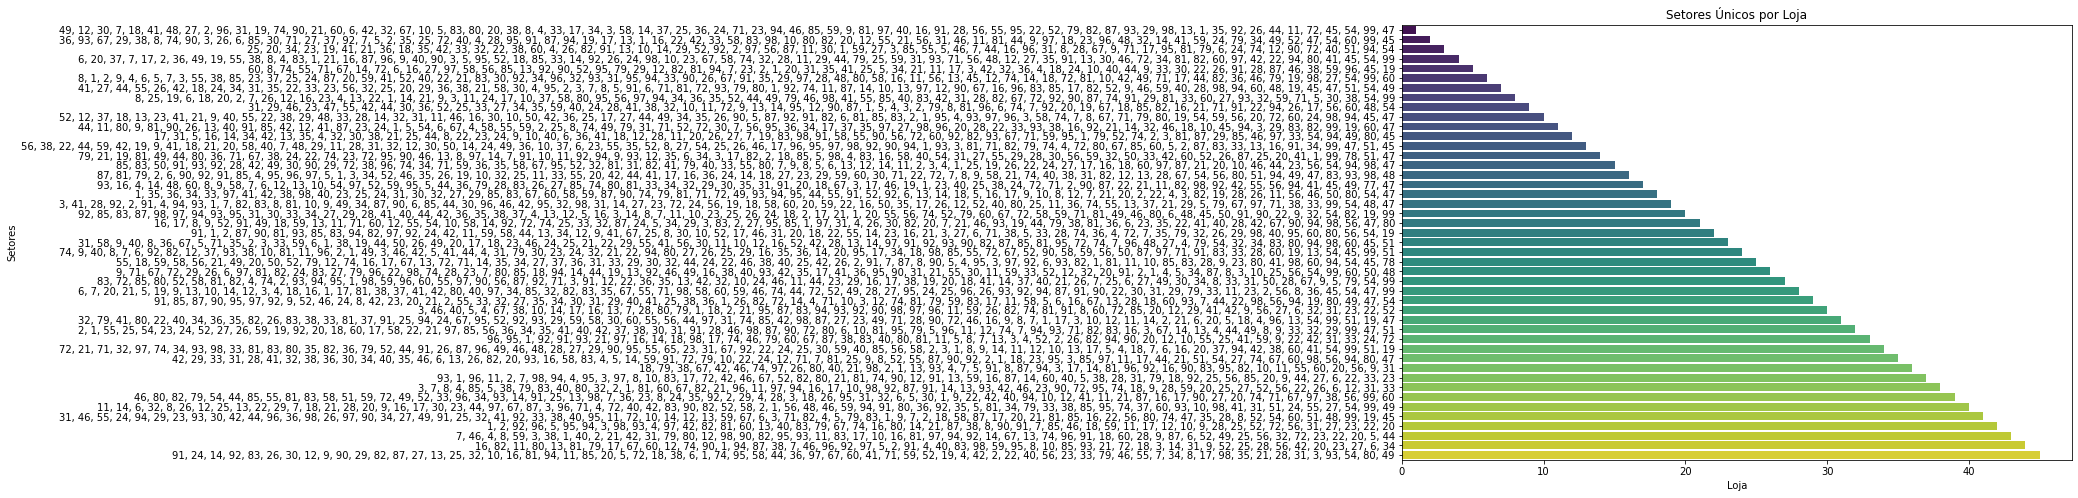

In [86]:
# Crie o DataFrame com os setores únicos por loja
setores_por_loja = df3.groupby('loja')['setor'].unique().reset_index()

# Converta os arrays de setores em strings
setores_por_loja['setor'] = setores_por_loja['setor'].apply(lambda x: ', '.join(map(str, x)))

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
sns.barplot(x='loja', y='setor', data=setores_por_loja, palette='viridis')
plt.title('Setores Únicos por Loja')
plt.xlabel('Loja')
plt.ylabel('Setores')
plt.show()

In [87]:
setores_por_loja

,loja,setor
0,1,"49, 12, 30, 7, 18, 41, 48, 27, 2, 96, 31, 19, ..."
1,2,"36, 93, 67, 29, 38, 8, 74, 90, 3, 26, 6, 85, 3..."
2,3,"25, 20, 34, 23, 19, 41, 21, 36, 18, 35, 42, 33..."
3,4,"6, 20, 37, 7, 17, 2, 36, 49, 19, 55, 38, 8, 4,..."
4,5,"60, 8, 74, 55, 71, 67, 14, 72, 6, 16, 27, 97, ..."
5,6,"8, 1, 2, 9, 4, 6, 5, 7, 3, 55, 38, 85, 23, 37,..."
6,7,"41, 27, 44, 55, 26, 42, 18, 24, 34, 31, 35, 22..."
7,8,"8, 25, 19, 6, 18, 20, 2, 7, 26, 12, 16, 23, 4,..."
8,9,"31, 29, 46, 23, 47, 55, 42, 44, 30, 36, 52, 25..."
9,10,"52, 12, 37, 18, 13, 23, 41, 21, 9, 40, 55, 22,..."


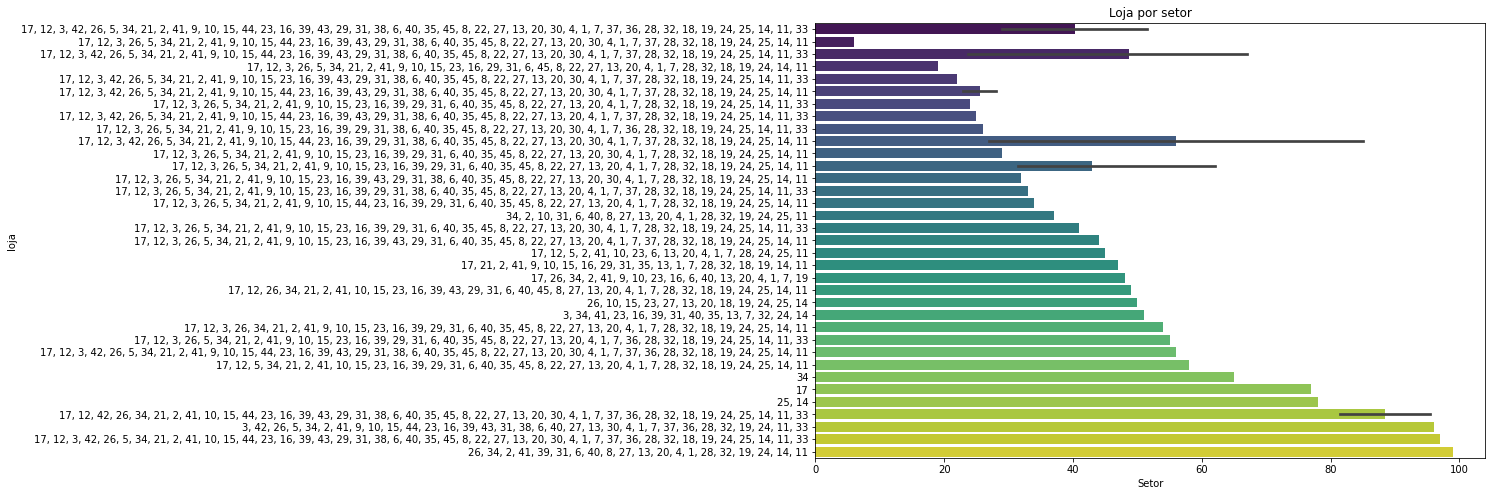

In [88]:
# Crie o DataFrame com os setores únicos por loja
setores_por_loja = df3.groupby('setor')['loja'].unique().reset_index()

# Converta os arrays de setores em strings
setores_por_loja['loja'] = setores_por_loja['loja'].apply(lambda x: ', '.join(map(str, x)))

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
sns.barplot(x='setor', y='loja', data=setores_por_loja, palette='viridis')
plt.title('Loja por setor')
plt.xlabel('Setor')
plt.ylabel('loja')
plt.show()

In [89]:
# Crie o DataFrame com os setores únicos por loja
loja_por_setor = df3.groupby('setor')['loja'].unique().reset_index()
loja_por_setor['tamanho'] = loja_por_setor['loja'].apply(lambda x: len(x))

loja_por_setor = loja_por_setor.sort_values(by='tamanho', ascending=False)
loja_por_setor

,setor,loja,tamanho
0,1,"[17, 12, 3, 42, 26, 5, 34, 21, 2, 41, 9, 10, 1...",45
62,79,"[17, 12, 3, 42, 26, 5, 34, 21, 2, 41, 9, 10, 1...",45
36,38,"[17, 12, 3, 42, 26, 5, 34, 21, 2, 41, 9, 10, 1...",45
37,40,"[17, 12, 3, 42, 26, 5, 34, 21, 2, 41, 9, 10, 1...",45
1,2,"[17, 12, 3, 42, 26, 5, 34, 21, 2, 41, 9, 10, 1...",45
...,...,...,...
47,51,"[3, 34, 41, 23, 16, 39, 31, 40, 35, 13, 7, 32,...",14
46,50,"[26, 10, 15, 23, 27, 13, 20, 18, 19, 24, 25, 14]",12
61,78,"[25, 14]",2
60,77,[17],1


In [90]:
setores_a = df3[(df3['setor'] == 78) | (df3['setor'] == 77) | (df3['setor'] == 65)]
setores_b = df3[(df3['setor'] != 78) & (df3['setor'] != 77) & (df3['setor'] != 65)]

In [91]:
feriado = df3[(df3['feriado'] == 1)]

In [92]:
feriado

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
297,155379,17,79,2023-02-11,25105.35000,1,eletronico,93188.0,3.034000,0.06866,300000.0,955,06,B,0.0
298,155402,17,10,2023-02-11,11108.77000,1,eletronico,93188.0,3.034000,0.06866,300000.0,955,06,B,0.0
299,155423,17,11,2023-02-11,10865.32000,1,eletronico,93188.0,3.034000,0.06866,300000.0,955,06,B,0.0
300,155469,17,14,2023-02-11,11772.51000,1,eletronico,93188.0,3.034000,0.06866,300000.0,955,06,B,0.0
301,155491,17,67,2023-02-11,12433.79000,1,eletronico,93188.0,3.034000,0.06866,300000.0,955,06,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109538,246350,33,3,2023-09-09,269.44000,1,eletrodomestico,39690.0,3.596658,0.08442,300000.0,319,36,B,0.0
109539,246417,33,5,2023-09-09,240.00000,1,eletrodomestico,39690.0,3.596658,0.08442,300000.0,319,36,B,0.0
109540,246465,33,8,2023-09-09,864992.08012,1,eletrodomestico,39690.0,3.596658,0.08442,300000.0,319,36,B,0.0
109541,246469,33,83,2023-09-09,2962.29000,1,eletrodomestico,39690.0,3.596658,0.08442,300000.0,319,36,B,0.0


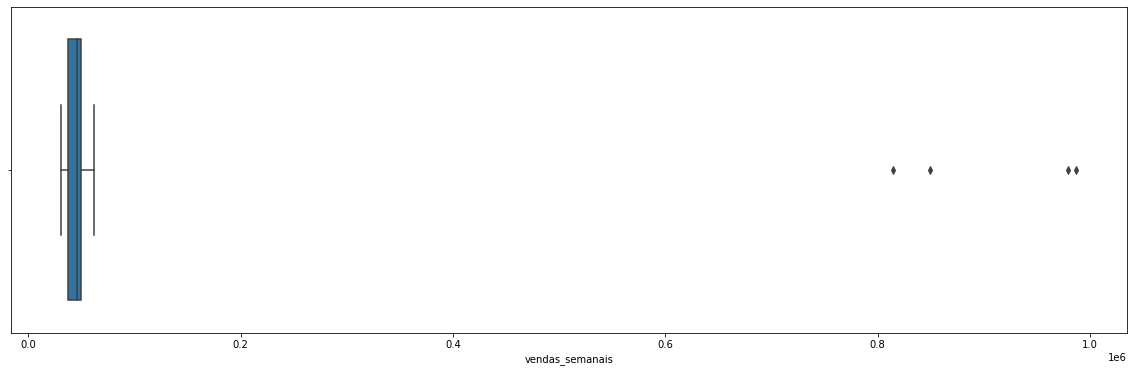

In [93]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=setores_a['vendas_semanais'])
plt.show()

In [94]:
# Crie o DataFrame com os setores únicos por loja
setores_por_loja = df3.groupby('loja')['setor'].unique().reset_index()
setores_por_loja['tamanho'] = setores_por_loja['setor'].apply(lambda x: len(x))

setores_por_loja = setores_por_loja.sort_values(by='tamanho', ascending=False)
setores_por_loja

,loja,setor,tamanho
12,13,"[56, 38, 22, 44, 59, 42, 19, 9, 41, 18, 21, 20...",76
0,1,"[49, 12, 30, 7, 18, 41, 48, 27, 2, 96, 31, 19,...",74
40,41,"[31, 46, 55, 24, 94, 29, 23, 93, 30, 42, 44, 9...",74
33,34,"[72, 21, 71, 32, 97, 74, 34, 93, 98, 33, 81, 8...",74
23,24,"[74, 9, 40, 8, 7, 6, 92, 82, 12, 37, 93, 38, 1...",74
1,2,"[36, 93, 67, 29, 38, 8, 74, 90, 3, 26, 6, 85, ...",74
9,10,"[52, 12, 37, 18, 13, 23, 41, 21, 9, 40, 55, 22...",74
18,19,"[3, 41, 28, 92, 2, 91, 4, 94, 93, 1, 7, 82, 83...",74
13,14,"[79, 21, 19, 81, 49, 44, 80, 36, 71, 67, 38, 2...",73
31,32,"[2, 1, 55, 25, 54, 23, 24, 52, 27, 26, 59, 19,...",73


In [95]:
# Crie o DataFrame com os setores únicos por loja
setores_por_loja = df3.groupby('loja')['setor'].unique().reset_index()

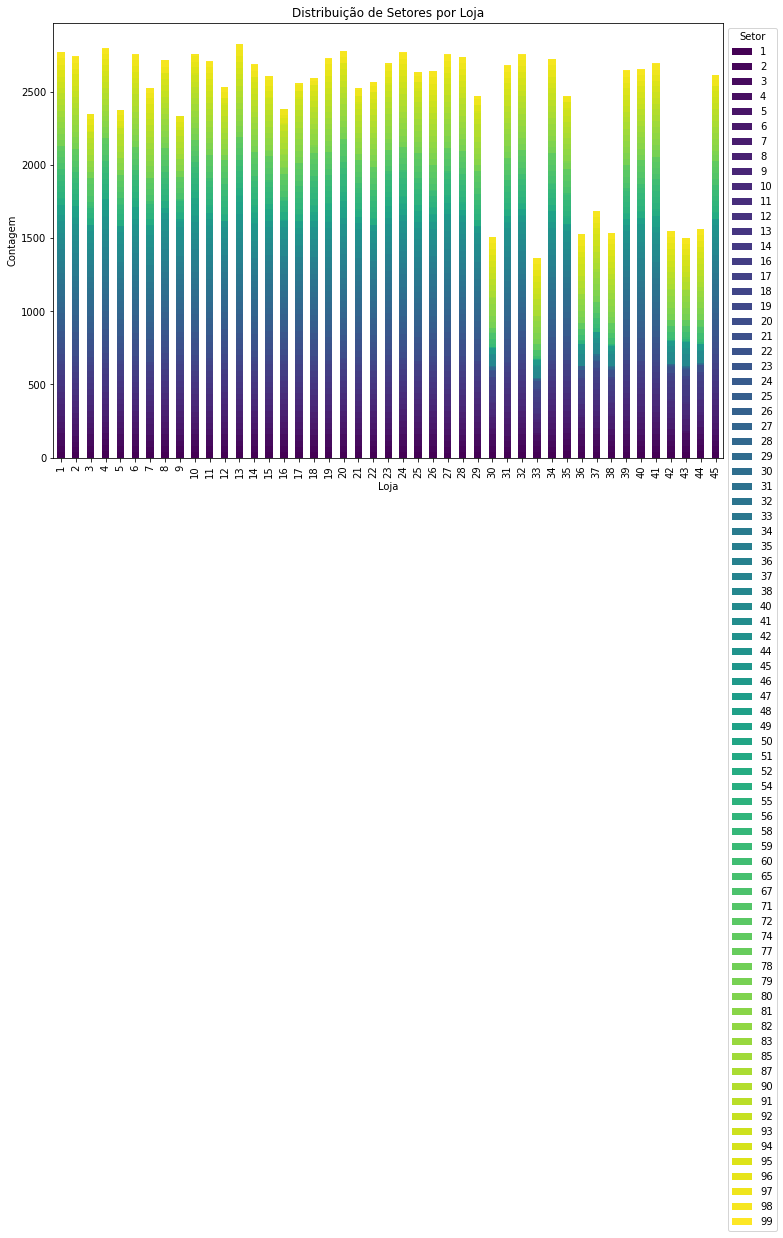

In [96]:
# Crie o DataFrame com os setores por loja
setores_por_loja = df3.groupby(['loja', 'setor']).size().unstack(fill_value=0).reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
setores_por_loja.plot(x='loja', kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribuição de Setores por Loja')
plt.xlabel('Loja')
plt.ylabel('Contagem')
plt.legend(title='Setor', bbox_to_anchor=(1, 1))
plt.show()

In [97]:
setores_por_loja = df3.groupby('loja')['setor'].unique().reset_index()
setores_por_loja

,loja,setor
0,1,"[49, 12, 30, 7, 18, 41, 48, 27, 2, 96, 31, 19,..."
1,2,"[36, 93, 67, 29, 38, 8, 74, 90, 3, 26, 6, 85, ..."
2,3,"[25, 20, 34, 23, 19, 41, 21, 36, 18, 35, 42, 3..."
3,4,"[6, 20, 37, 7, 17, 2, 36, 49, 19, 55, 38, 8, 4..."
4,5,"[60, 8, 74, 55, 71, 67, 14, 72, 6, 16, 27, 97,..."
5,6,"[8, 1, 2, 9, 4, 6, 5, 7, 3, 55, 38, 85, 23, 37..."
6,7,"[41, 27, 44, 55, 26, 42, 18, 24, 34, 31, 35, 2..."
7,8,"[8, 25, 19, 6, 18, 20, 2, 7, 26, 12, 16, 23, 4..."
8,9,"[31, 29, 46, 23, 47, 55, 42, 44, 30, 36, 52, 2..."
9,10,"[52, 12, 37, 18, 13, 23, 41, 21, 9, 40, 55, 22..."


In [98]:
setor_por_dia = df3.groupby(['data', 'setor'])['vendas_semanais'].mean().reset_index()
setor_por_dia

,data,setor,vendas_semanais
0,2023-01-07,1,113848.322764
1,2023-01-07,2,117859.230165
2,2023-01-07,3,98052.430083
3,2023-01-07,4,108155.796432
4,2023-01-07,5,19486.681500
...,...,...,...
3282,2023-11-04,94,67569.841535
3283,2023-11-04,95,104736.469893
3284,2023-11-04,96,185102.759271
3285,2023-11-04,97,76370.629064


In [99]:
setor_por_loja = df3.loc[:, :].groupby(['loja', 'setor']).mean().reset_index()
setor_por_loja

,loja,setor,id,vendas_semanais,feriado,tamanho,combustivel,desemprego,distancia_competidores,clientes,desconto
0,1,1,202403.500000,84525.780032,0.050000,151315.0,3.502339,0.077954,300000.0,507.225000,0.0
1,1,2,207054.365854,102919.460433,0.048780,151315.0,3.496908,0.078161,300000.0,523.146341,0.0
2,1,3,206572.790698,52377.589662,0.046512,151315.0,3.504013,0.078099,300000.0,506.906977,0.0
3,1,4,203325.833333,89603.862669,0.047619,151315.0,3.510981,0.078033,300000.0,524.309524,0.0
4,1,5,206172.564103,41570.322001,0.051282,151315.0,3.517476,0.078183,300000.0,528.641026,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3046,45,93,207362.236842,28001.206757,0.052632,0.0,3.661409,0.085615,300000.0,465.447368,0.0
3047,45,94,205298.435897,51377.820210,0.051282,0.0,3.654142,0.085612,300000.0,442.974359,0.0
3048,45,95,207074.641026,119668.205462,0.025641,0.0,3.686552,0.085623,300000.0,461.820513,0.0
3049,45,97,203590.894737,32059.307157,0.052632,0.0,3.653382,0.085594,300000.0,474.947368,0.0


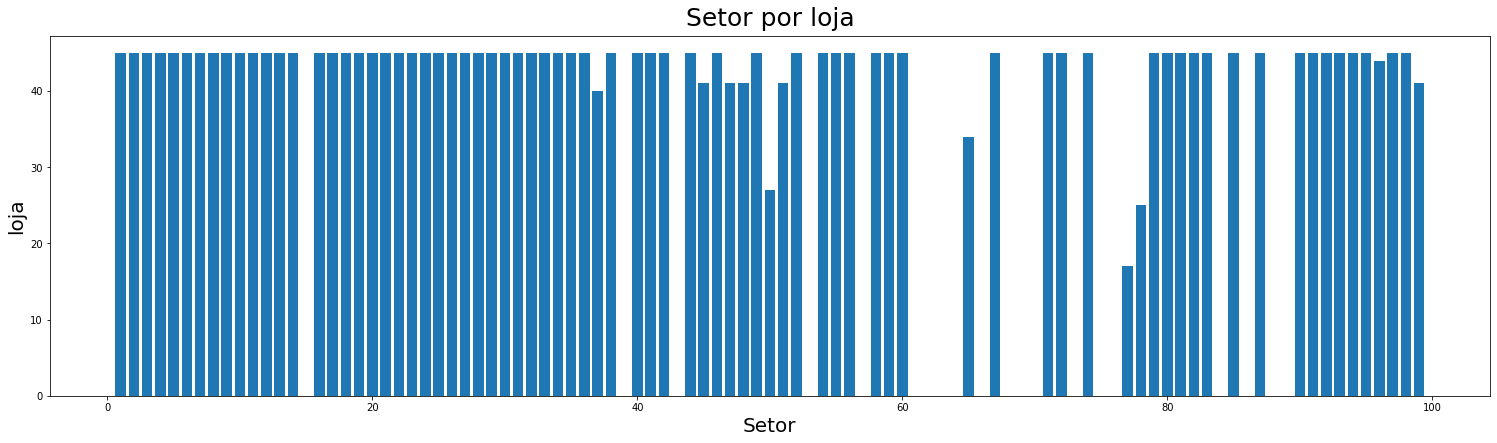

In [100]:
# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Configura o título e os eixos
ax.set_title('Setor por loja', fontsize=25, pad=10)
ax.set_xlabel('Setor', fontsize=20)
ax.set_ylabel('loja', fontsize=20)

# Plota e mostra o gráfico
ax.bar(setor_por_loja['setor'], setor_por_loja['loja'])
plt.show()

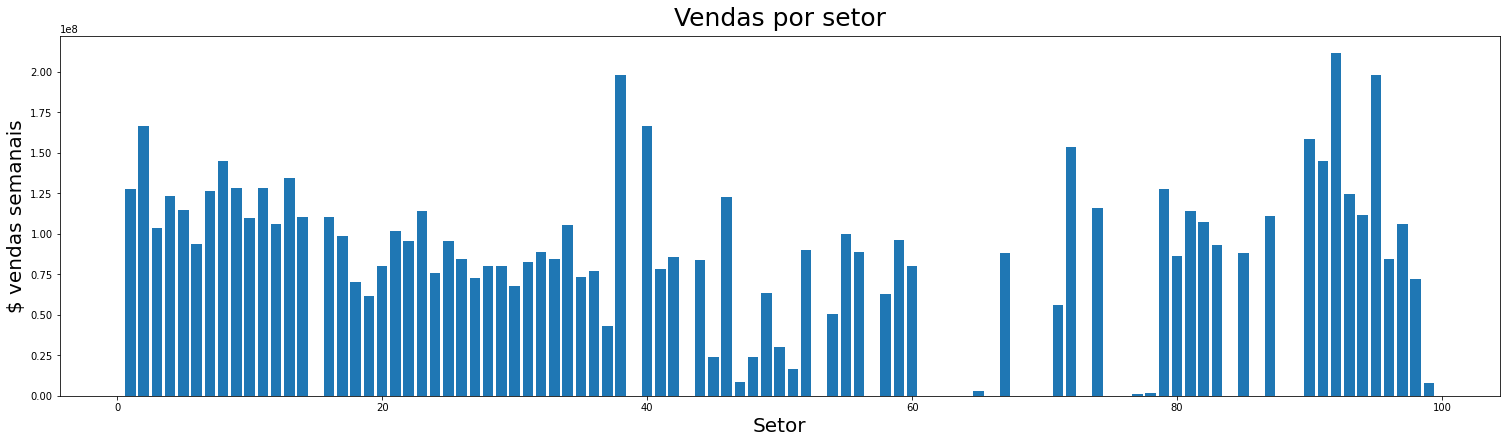

In [101]:
vendas_por_setor = df2.loc[:, :].groupby('setor').sum().reset_index()
vendas_por_setor.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_setor['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por setor', fontsize=25, pad=10)
ax.set_xlabel('Setor', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_setor['setor'], vendas_por_setor['vendas_semanais'])
plt.show()

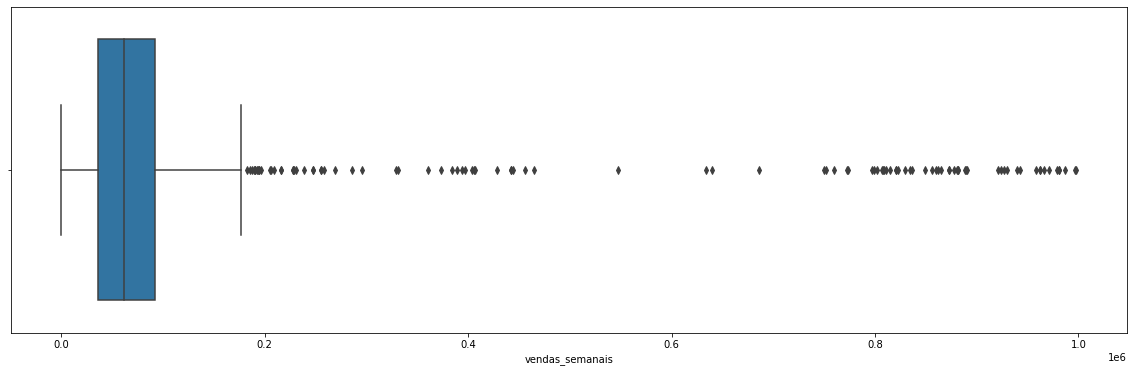

In [102]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=setor_por_dia['vendas_semanais'])
plt.show()

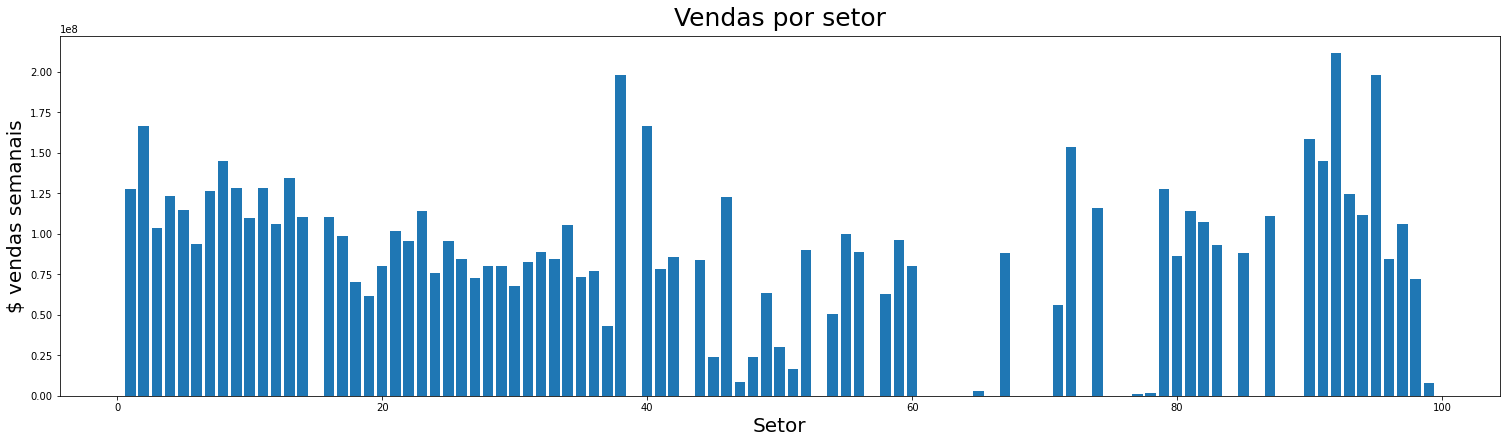

In [103]:
vendas_por_setor = df2.loc[:, :].groupby('setor').sum().reset_index()
vendas_por_setor.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_setor['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por setor', fontsize=25, pad=10)
ax.set_xlabel('Setor', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_setor['setor'], vendas_por_setor['vendas_semanais'])
plt.show()

### 3.2.4. Vendas por clientes

In [109]:
test_features
test_features.loc[test_features['clientes'] < 20]

,loja,data,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,feriado,distancia_competidores,clientes
3,21,11-25,13.572222,3.236,233.85,206.36,40561.80,319.19,170.64,0.07441,sim,5297.0,1
125,3,12-09,9.588889,3.158,4059.38,6.47,123.42,833.44,3018.08,0.07197,nao,10101.0,16
157,44,12-16,-2.305556,3.282,29.40,NaN,6.75,NaN,1041.62,0.06078,nao,4017.0,8


In [108]:
test_features.shape

(270, 13)

In [105]:
df3.loc[df3['clientes'] < ]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
5860,181834,3,34,2023-04-15,4888.370000,0,eletronico,0.0,3.743000,0.07574,300000.0,8,15,A,0.0
5861,181879,3,67,2023-04-15,1772.370000,0,eletronico,0.0,3.743000,0.07574,300000.0,8,15,A,0.0
5862,181960,3,17,2023-04-15,2575.690000,0,eletronico,0.0,3.743000,0.07574,300000.0,8,15,A,0.0
5863,182010,3,21,2023-04-15,1019.140000,0,eletronico,0.0,3.743000,0.07574,300000.0,8,15,A,0.0
5864,182063,3,31,2023-04-15,814372.355668,0,eletronico,0.0,3.743000,0.07574,300000.0,8,15,A,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89616,143488,32,3,2023-01-07,15352.860000,0,eletrodomestico,203007.0,3.596658,0.08818,300000.0,3,01,C,0.0
89617,143492,32,67,2023-01-07,5866.710000,0,eletrodomestico,203007.0,3.596658,0.08818,300000.0,3,01,C,0.0
89618,143522,32,14,2023-01-07,14509.990000,0,eletrodomestico,203007.0,3.596658,0.08818,300000.0,3,01,C,0.0
89619,143544,32,13,2023-01-07,31428.790000,0,eletrodomestico,203007.0,3.596658,0.08818,300000.0,3,01,C,0.0


In [106]:
test

,id,loja,setor,data,feriado
0,276064,20,16,11-25,sim
1,276065,39,14,11-25,sim
2,276066,40,5,11-25,sim
3,276067,24,92,11-25,sim
4,276068,22,20,11-25,sim
...,...,...,...,...,...
18063,294127,11,94,12-30,sim
18064,294128,15,18,12-30,sim
18065,294129,11,30,12-30,sim
18066,294130,37,46,12-30,sim


### 3.2.5. Vendas por semana

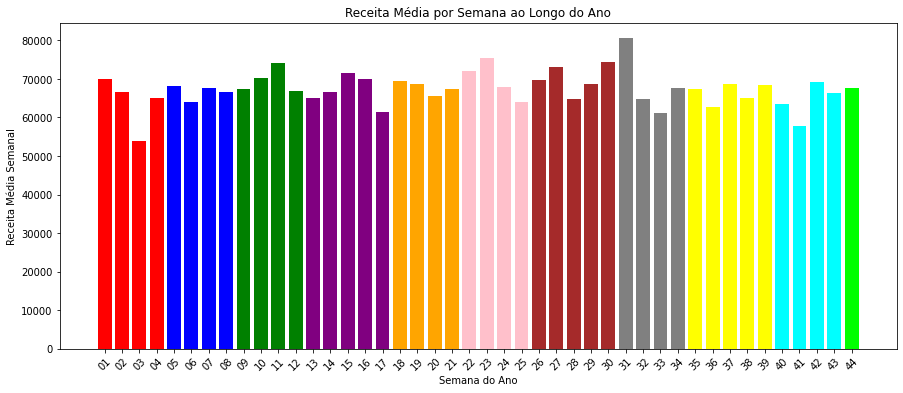

In [121]:
df = df3.copy()
# Adicione a coluna 'mes' ao DataFrame
df['mes'] = df['data'].dt.month

# Criar uma coluna de semana para agrupar as barras
df['week_of_year'] = df['data'].dt.strftime('%U')

# Calcular a média da receita para cada semana (ou qualquer outra métrica desejada)
df_semanal = df.groupby(['week_of_year', 'mes'])['vendas_semanais'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))

# Destacar as semanas que representam o início de cada mês
cores = df_semanal['mes'].map({1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange', 6: 'pink', 7: 'brown', 8: 'grey', 9: 'yellow', 10: 'cyan', 11: 'lime', 12: 'black'})
plt.bar(df_semanal['week_of_year'], df_semanal['vendas_semanais'], color=cores)

plt.xlabel('Semana do Ano')
plt.ylabel('Receita Média Semanal')
plt.title('Receita Média por Semana ao Longo do Ano')
plt.xticks(rotation=45)
plt.show()

## 3.1. Análise Multivariada

### 3.1.1. Profile

In [ ]:
profile = ydata_profiling.ProfileReport(df3, minimal=False)

profile = df3.profile_report(
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "cramers": {"calculate": True},
        "phi_k": {"calculate": False},
    },)

In [ ]:
#profile

### 3.1.2. HeatMap

C:\Users\paula\AppData\Local\Temp\ipykernel_13108\1603569551.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
C:\Users\paula\AppData\Local\Temp\ipykernel_13108\1603569551.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


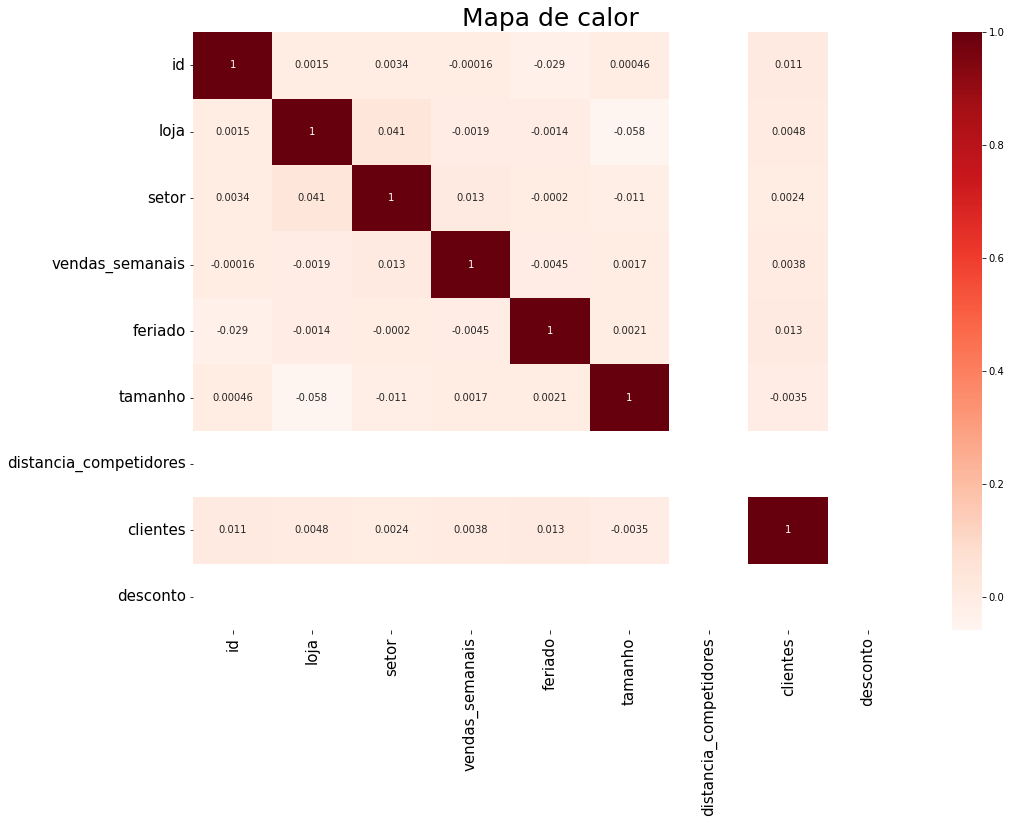

In [136]:
# Criar o mapa de calor
corr = df3.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 11))

# Configura o título e os eixos
ax.set_title('Mapa de calor', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Plota e mostra o gráfico
ax = sns.heatmap(corr, annot=True, cmap='Reds', ax=ax)
plt.show()

# 4. DATA PREPARATION

# 5. FEATURE SELECTION

## 5.1. Split dataframe into training and test

# 6. MACHINE LEARNING MODELING

## 6.1. Treinar, testar e medir

## 6.2. Validar métricas

# 7. ERROR TRANSLATION AND INTERPRETATION

# 8. DEPLOY / SUBMISSION